# **Aplicaciones Financieras de ML & AI**
## **Examen I:** *Clasificación*



#### Nombre: Julio César Avila Torreblanca

- **Descripción del problema**: desarrolle un algoritmo para tratar de
realizar predicciones dado un dataset. El algoritmo puede ser cualquiera
de los vistos en clase: semana 1,2,3.

- **Descripción de los datos**: el archivo tiene nombre “AMF_data.csv” y
contiene las variables:
    - Share: Stock en el que están invirtiendo
    - Date: Fecha en que lo realizó
    - Trader: Etiqueta con la que se identifica al inversor
    - OTR: Número de intercambios que realizó (trades)
    - OCR: Eventos de tipo cancelación
    - OMR: Eventos de tipo modificación
    - type: Tipo de trader (HFT: High Frequency trader, NON-HFT)
    - Para más información sobre las demás características ir al <a href="https://challengedata.ens.fr/participants/challenges/50/">[link]</a>.

<a href="https://github.com/MaxMitre/Aplicaciones-Financieras/blob/main/Semana4-Examen/AMF_data.csv">[Link]</a> del dataset a trabajar en el notebook.

- **Contenido del notebook**:
    1. Librerías y parámetros
    2. Lectura de los datos
    3. Limpieza y Anális Exploratorio (EDA)
    4. Preparación de los datos
    5. Modelado
    6. Evaluación
    7. Conclusiones



# 1. Librerías y parámetros

In [ ]:
# data
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# test
from sklearn.metrics import classification_report


# 2. Lectura de los datos

In [ ]:
df = pd.read_csv('data/AMF_data.csv', index_col=0)

# 3. Limpieza y Análisis Exploratorio
Aquí limpiearemos y conoceremos los datos, haciendo énfaisis en:
- Tipos de variables
- Registros duplicados
- Porcentajes de nulos
- Definir variables predictoras y variable objetivo

## 3.1 Tipos de variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54299 entries, 1 to 105782
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Share                       54299 non-null  object 
 1   Day                         54299 non-null  object 
 2   Trader                      54299 non-null  object 
 3   OTR                         52699 non-null  float64
 4   OCR                         54299 non-null  float64
 5   OMR                         17759 non-null  float64
 6   min_time_two_events         54299 non-null  float64
 7   mean_time_two_events        54299 non-null  float64
 8   10_p_time_two_events        54299 non-null  float64
 9   med_time_two_events         54299 non-null  float64
 10  25_p_time_two_events        54299 non-null  float64
 11  75_p_time_two_events        54299 non-null  float64
 12  90_p_time_two_events        54299 non-null  float64
 13  max_time_two_events         54299 n

In [ ]:
df.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.598,682.153260,8272.770569,682.153260,984.32056,682.15326,23151.83800,23151.8380,23151.838,1,7,2.750000,351.702399,9639.216031,1585.079495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.357,11.866026,3796.632686,11.866026,177.93991,73.74323,808.26230,21433.6840,21433.684,1,17,5.933333,0.000066,493.559196,0.000901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,0.000129,5.725427,448.88360,30799.467,2.761036,1397.103679,2.761036,187.99548,19.77734,418.23984,1953.6235,10842.464,1,20,5.063492,0.000018,163.954785,0.000770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.719,286.019320,9736.869034,286.019320,286.01932,286.01932,19187.71900,19187.7190,19187.719,1,8,4.250000,0.000148,1232.562133,0.004301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,0.000146,2.225420,273.45676,23164.514,2.798452,10066.803990,2.798452,1345.95280,662.57434,21903.78300,23164.5140,23164.514,1,19,3.710526,0.000025,248.073927,0.001364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


In [ ]:
df.shape

(54299, 39)

In [ ]:
df['type'].value_counts(dropna=False, normalize=True)*100

type
HFT        58.840863
NON HFT    41.159137
Name: proportion, dtype: float64

Tenemos 54,299 registros con 39 variables, de las cuales:
- 35 son numéricas
- 4 categóricas (Sahre, Day, Trader, type)

Aquí la variable *type* será la variable objetivo,dado que contiene si un trader es de tipo 'HFT' o 'NON HFT'.
Notemoste que esta varuavle NO contiene valores nulos y además HFT es la clase matoritaría, pero con un desbalance pequeño (aprox. 8%).

## 3.2 Registros duplicados

In [ ]:
# Verificar registros duplicados
duplicated_rows = df.duplicated(keep='first') # True: duplicated | False: not duplicated

# Mostrar registros duplicados
df.loc[duplicated_rows[duplicated_rows == True].index, :] \
  .sort_values(by=['Share', 'Day', 'Trader']) \
  .head(10)

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,10_p_lifetime_cancel,med_lifetime_cancel,25_p_lifetime_cancel,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14759,Isin_1,Date_10,Trader_161,9.666667,3.625000,NaN,0.000008,25819.617910,34.090748,37206.664000,6809.053700,37206.66400,37499.9840,37499.984,122.048490,27890.123620,122.048490,37206.664000,6809.053700,37206.66400,37206.66400,37206.664,2,4,2.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,HFT
14760,Isin_1,Date_10,Trader_161,9.666667,3.625000,NaN,0.000008,25819.617910,34.090748,37206.664000,6809.053700,37206.66400,37499.9840,37499.984,122.048490,27890.123620,122.048490,37206.664000,6809.053700,37206.66400,37206.66400,37206.664,2,4,2.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,HFT
78540,Isin_1,Date_10,Trader_386,240.600000,2.016426,NaN,0.000000,300.730117,0.451373,15.005237,6.158090,125.67504,616.3361,14865.646,0.000025,302.243121,0.561727,15.315247,6.179826,126.94057,617.18964,14865.646,5,12,2.73913,0.000026,832.333859,4.102683,0.000019,380.338250,0.004746,0.000310,187.957624,2.921243,0.000204,181.906464,2.921243,23,HFT
78541,Isin_1,Date_10,Trader_386,240.600000,2.016426,NaN,0.000000,300.730117,0.451373,15.005237,6.158090,125.67504,616.3361,14865.646,0.000025,302.243121,0.561727,15.315247,6.179826,126.94057,617.18964,14865.646,5,12,2.73913,0.000026,832.333859,4.102683,0.000019,380.338250,0.004746,0.000310,187.957624,2.921243,0.000204,181.906464,2.921243,23,HFT
78542,Isin_1,Date_10,Trader_386,240.600000,2.016426,NaN,0.000000,300.730117,0.451373,15.005237,6.158090,125.67504,616.3361,14865.646,0.000025,302.243121,0.561727,15.315247,6.179826,126.94057,617.18964,14865.646,5,12,2.73913,0.000026,832.333859,4.102683,0.000019,380.338250,0.004746,0.000310,187.957624,2.921243,0.000204,181.906464,2.921243,23,HFT
17006,Isin_1,Date_11,Trader_161,4.000000,5.600000,NaN,0.000000,8831.878984,0.000000,8.442928,0.000000,18313.42000,18675.3850,18675.385,18018.023000,18412.243950,18018.023000,18674.508000,18018.357000,18675.38500,18675.38500,18675.385,5,4,1.80000,12.121665,2143.872490,390.211684,272.124020,3213.004538,390.211684,0.000002,3122.296532,390.211684,390.211684,4683.444797,390.211684,10,HFT
17007,Isin_1,Date_11,Trader_161,4.000000,5.600000,NaN,0.000000,8831.878984,0.000000,8.442928,0.000000,18313.42000,18675.3850,18675.385,18018.023000,18412.243950,18018.023000,18674.508000,18018.357000,18675.38500,18675.38500,18675.385,5,4,1.80000,12.121665,2143.872490,390.211684,272.124020,3213.004538,390.211684,0.000002,3122.296532,390.211684,390.211684,4683.444797,390.211684,10,HFT
82868,Isin_1,Date_11,Trader_386,72.679487,2.054730,NaN,0.000000,341.400379,0.073923,29.301718,4.800498,203.28757,812.3160,14010.186,0.000019,351.181758,0.135152,32.501514,5.616005,218.34373,843.78630,14010.186,8,16,3.12500,0.000023,98.748674,0.053552,0.000002,17.106992,0.000408,0.000004,25.225987,0.000720,0.000037,26.706881,0.000720,88,HFT
82869,Isin_1,Date_11,Trader_386,72.679487,2.054730,NaN,0.000000,341.400379,0.073923,29.301718,4.800498,203.28757,812.3160,14010.186,0.000019,351.181758,0.135152,32.501514,5.616005,218.34373,843.78630,14010.186,8,16,3.12500,0.000023,98.748674,0.053552,0.000002,17.106992,0.000408,0.000004,25.225987,0.000720,0.000037,26.706881,0.000720,88,HFT


In [ ]:
df.loc[duplicated_rows[duplicated_rows == True].index, :].shape

(9530, 39)

Existen 9,530 registros duplciados, pues TODAS sus variables son iguales.
Eliminaremos estos registros duplicados, conservando solo uno.

In [ ]:
df_clean = df.loc[duplicated_rows[duplicated_rows == False].index, :]
df_clean.shape

(44769, 39)

## 3.3 Porcentaje de nulos

In [ ]:
df_clean.isnull().sum().sort_values(ascending=False) / len(df) * 100

OMR                           52.122507
min_dt_TV1_TV3                33.766736
med_dt_TV1_TV3                33.766736
mean_dt_TV1_TV3               33.766736
med_dt_TV1_TV2                33.687545
mean_dt_TV1_TV2               33.687545
min_dt_TV1_TV2                33.687545
med_dt_TV1_TV4                33.545737
mean_dt_TV1_TV4               33.545737
min_dt_TV1_TV4                33.545737
min_dt_TV1                     6.611540
med_dt_TV1                     6.611540
mean_dt_TV1                    6.611540
OTR                            2.847198
MaxNbTradesBySecond            0.000000
MeanNbTradesBySecond           0.000000
Share                          0.000000
max_lifetime_cancel            0.000000
NbSecondWithAtLeatOneTrade     0.000000
NbTradeVenueMic                0.000000
75_p_lifetime_cancel           0.000000
90_p_lifetime_cancel           0.000000
Day                            0.000000
Trader                         0.000000
OCR                            0.000000


La varible *OMR* tiene más del 50% de valores nulos.
Las variables:
- *min_dt_TV1_TV3*
- *med_dt_TV1_TV3*
- *mean_dt_TV1_TV3*
- *med_dt_TV1_TV2*
- *mean_dt_TV1_TV2*
- *min_dt_TV1_TV2*
- *med_dt_TV1_TV4*
- *mean_dt_TV1_TV4*
- *min_dt_TV1_TV4*

tienen  aproximadamente un tercio de valores nulos.

Para no meter mucho ruido al modelo a la hora de imputar valroes, eliminaremos estas variables.

In [ ]:
cols_to_drop = [
    'OMR',
    'min_dt_TV1_TV3',
    'med_dt_TV1_TV3',
    'mean_dt_TV1_TV3',
    'med_dt_TV1_TV2',
    'mean_dt_TV1_TV2',
    'min_dt_TV1_TV2',
    'med_dt_TV1_TV4',
    'mean_dt_TV1_TV4',
    'min_dt_TV1_TV4',
]

df_clean = df_clean.drop(columns=cols_to_drop)
df_clean.shape

(44769, 29)

# 4. Preparación de los datos
Aquí separaremos el dataset en 4 conjuntos *X_train, y_train, X_test, y_test*. Tomaremos 80% de los datos para el entrenamiento y 20% para el test.

In [ ]:
meatadata_cols = [
    'Share',
    'Day',
    'Trader',
    'type',
]

X = df_clean.drop(columns=meatadata_cols)
y = df_clean.loc[:, meatadata_cols]

# target creation
y['target'] = y['type'].map({'HFT': 1, 'NON HFT': 0})

# data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42)


In [ ]:
y_train['type'].value_counts(normalize=True)

type
HFT        0.503923
NON HFT    0.496077
Name: proportion, dtype: float64

In [ ]:
y_test['type'].value_counts(normalize=True)

type
HFT        0.501229
NON HFT    0.498771
Name: proportion, dtype: float64

Note que en ambos datasets *y_train* y *y_test* se preserva la districión de la variable objetivo.

# 5. Modeling
En esta parte definiremos el pipeline para el modelo. Este tendrá:
- Imputación de valores nulos con -1, para distinguir un valor nulo del resto de valores que si existen.
- Scalamiento de los datos, usando StandarScaler para que las variables de entrada tengan una distribución normal.
- Modelo a entrenar: LDA.

Utilizaremos los pipelines de Sklearn.

In [ ]:
# compose with preprocessing + model
full_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=-1),
    StandardScaler(),
    LinearDiscriminantAnalysis()
)

# train the model
full_pipeline.fit(X_train, y_train['target'])

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value=-1, strategy='constant')),
                ('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

# 5. Test
Aquí evaluaremos el desempeño del modelo durante su entrenamiento y en el test. Además veremos que variables tienen mayor peso al analizar los coeficientes.

In [ ]:
y_train['predictions'] = full_pipeline.predict(X_train)
y_test['predictions'] = full_pipeline.predict(X_test)

print('Train metrics:')
print(classification_report(y_train['target'], y_train['predictions']))

print('-'*50)

print('Test metrics:')
print(classification_report(y_test['target'], y_test['predictions']))


Train metrics:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     17767
           1       0.91      0.92      0.92     18048

    accuracy                           0.91     35815
   macro avg       0.91      0.91      0.91     35815
weighted avg       0.91      0.91      0.91     35815

--------------------------------------------------
Test metrics:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4466
           1       0.90      0.92      0.91      4488

    accuracy                           0.91      8954
   macro avg       0.91      0.91      0.91      8954
weighted avg       0.91      0.91      0.91      8954



El modelo tiene un gran desempeño, con un accuracy y f1_score de 91% en el train, mientras que en el test también se preservan los valores.

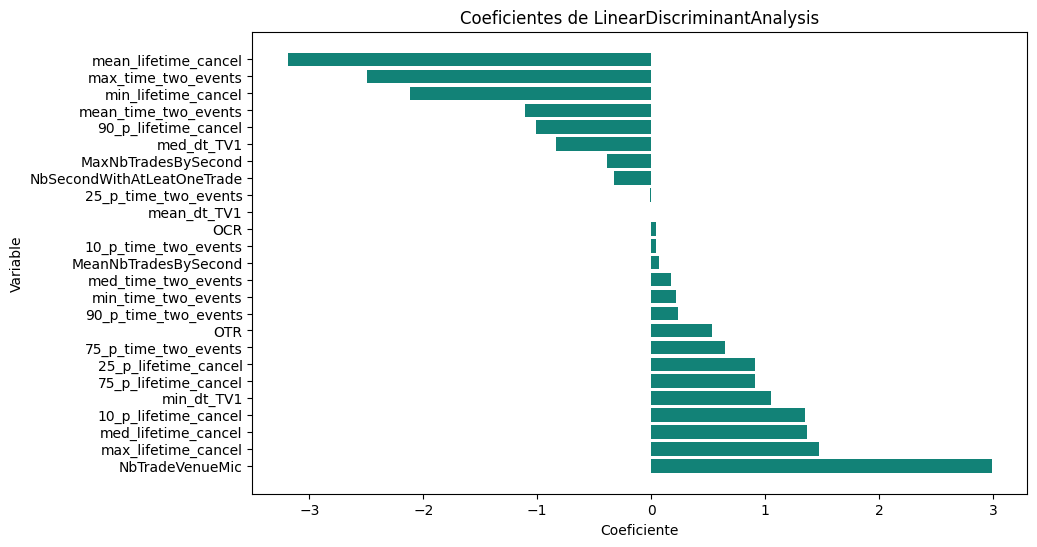

In [ ]:
# plot de los coeficientes
coef = full_pipeline.steps[2][1].coef_[0]
cols = full_pipeline.feature_names_in_

df_coef = pd.DataFrame({
    'Feature': cols,
    'Coefficient': coef
})

df_coef = df_coef.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_coef['Feature'],
         df_coef['Coefficient'],
         color='#128277')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Coeficientes de LinearDiscriminantAnalysis')
plt.show()

Aquí las variables *mean_lifetime_cancel* y *NbTradeVenueMic* son las que mayor peso tienen en el modelo. La primera con peso negativo y la segunda con positivo.

# 6. Conclusiones

#### ¿Por qué utilizar el modelo que desarrolló y no otro?
Aquí tomamos LinearDiscriminantAnalysis como modelo a desarrollar, dado que la tarea buscada es hacer un modelo de clasificación binaria que nos permita distinguir entre dos clases. Este modelo justo nos permite separar dichas clases. Además, la cantidad de variables es pequeña y es más sencillo usar modelos simples e interpretables para generar una solución.


#### ¿En caso de haber tenido que escoger otro, que modelo usaría?
De los modelos vistos en clase, hubiera tomado un percentrón multicapa que me permitiera clasificar ambas clases. Como primer aproximación, solo usaría una sola capa oculta con una cantidad de neuronas menor a la capa de entrada; la mitad por ejemplo, con función de activación sigmoide. Esto con el objetivo de ver el desempeño del modelo y analizar si es necesario modificar la red. La función sigmoide me regrearía valores entre 0 y 1, por lo que podría ser sencillo definir un umbral para el modelo clasificador y así separar bien las clases.

